
Use the HR Promotion Dataset given below to build a clustering model. Before building the model, handle the missing values in the data. 

1) What should be the ideal number of clusters.

2) What do you infer from the clusters?

In [1]:
import pandas as pd

In [2]:
hr_promotion = pd.read_csv('F:\Skillenable\Data frames\HR-Promotion.csv')
hr_promotion.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
hr_promotion.info()
hr_promotion.isnull().sum()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [4]:
# fill the unknown education with 'other' text.
hr_promotion['education'].fillna('other', inplace= True)
hr_promotion.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
# replace missing previous_year_rating with mean of previous_year_rating
hr_promotion['previous_year_rating'].fillna (hr_promotion['previous_year_rating'].mean(), inplace = True)
hr_promotion.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [6]:
hr_promotion.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.211661,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
# Que: mean KPI based on education
avg_KPI = hr_promotion.groupby('education')[['KPIs_met >80%']].mean().reset_index()
avg_KPI

,education,KPIs_met >80%
0,Bachelor's,0.354496
1,Below Secondary,0.400000
2,Master's & above,0.360134
3,other,0.246990


In [8]:
# Que: mean training score based on education
avg_score = hr_promotion.groupby('education')[['avg_training_score']].mean().reset_index()
avg_score

,education,avg_training_score
0,Bachelor's,63.422046
1,Below Secondary,64.925466
2,Master's & above,64.061240
3,other,58.156496


In [9]:
#dropping employee_id
hr_promotion.drop(columns=['employee_id'], inplace = True)
hr_promotion.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [10]:
#creating dummy data for categorical values
cat_col = ['department', 'region', 'education', 'gender', 'recruitment_channel']
cat_col

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [11]:
hr_dummy = pd.get_dummies(hr_promotion, columns = cat_col, drop_first= True)
hr_dummy.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_other,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
# Build the cluster model
from sklearn.cluster import KMeans


In [13]:
# assuming cluster values as 14
## range function 
for i in range (1,15):
    print (i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [14]:
# prepare data
error = []
for k in range (1,15):
    km = KMeans(n_clusters = k)
    km.fit(hr_dummy) # give data
    error.append(km.inertia_) #to get error
    

In [15]:
error

[14260343.756516708,
 6586434.0584448995,
 4861256.75124786,
 3862819.8052812843,
 3168669.8380503887,
 2836239.009343923,
 2531132.8410585816,
 2285533.4066659724,
 2084438.9693866898,
 1967035.533432619,
 1864024.80133287,
 1765398.6817426437,
 1674259.9594258785,
 1596058.5843674731]

<function matplotlib.pyplot.show(close=None, block=None)>

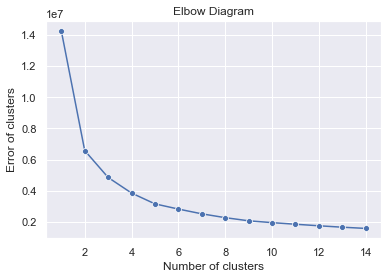

In [40]:
# Plot the elbow curve/diagram
# do some plotting before building the model

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

sns.lineplot(range(1,15), error, marker='o')
plt.title('Elbow Diagram')
plt.xlabel('Number of clusters')
plt.ylabel('Error of clusters')
plt.show

In [29]:
# Select 10 cluster points cause elbow curve tends to falt after 10 points
# Build model with 5 cluster points
km_10 = KMeans(n_clusters= 10).fit(hr_dummy)

In [30]:
clusters = km_10.fit_predict(hr_dummy)

In [31]:
# creating new column 
hr_dummy['cluster'] = clusters
hr_dummy.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_other,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,cluster
0,1,35,5.0,8,1,0,49,0,0,0,...,1,0,0,0,1,0,0,0,1,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,0,0,0,1,0,1,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,0,0,0,1,0,0,4
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,0,0,1,0,0,2


In [32]:
# identify how many values in each cluster
hr_dummy['cluster'].value_counts()
hr_dummy.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_other,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,cluster
0,1,35,5.0,8,1,0,49,0,0,0,...,1,0,0,0,1,0,0,0,1,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,0,0,0,1,0,1,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,0,0,0,1,0,0,4
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,0,0,1,0,0,2


In [36]:
# identify individual cluster
hr_dummy.groupby('cluster')[['previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'avg_training_score']].mean()

,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score
cluster,,,,
0,3.316588,13.096682,0.304265,76.981517
1,3.129424,4.186050,0.286282,49.303098
2,3.338892,6.851746,0.359763,81.441687
3,3.446501,2.644036,0.399112,59.635364
4,3.134280,7.433513,0.276926,49.513670
5,3.420517,3.634784,0.402253,83.178952
6,3.292492,4.790558,0.374976,69.954537
7,3.290666,15.530130,0.246948,53.984246
8,3.558551,7.673677,0.404472,61.943547


C:\Users\arun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous_year_rating', ylabel='KPIs_met >80%'>

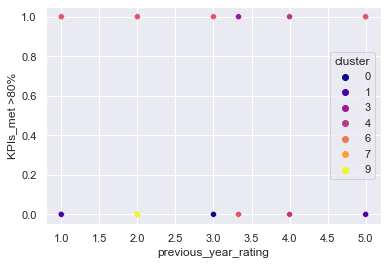

In [38]:
# plot a scatter plot for the the same we just done

sns.scatterplot(hr_dummy['previous_year_rating'], hr_dummy['KPIs_met >80%'], hue= hr_dummy['cluster'], palette='plasma')